# Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import os
import utilities as utils
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances;
%matplotlib widget

In [ ]:
import importlib
importlib.reload(utils)

In [ ]:
import gc
gc.collect()

In [ ]:
dataset = 'repr_dataset'

In [ ]:
labels = []
cgr_mats = []
seqs = []
#cgr_flattened = []
for dir1 in [dir for dir in os.listdir(dataset) if not dir.startswith('.')]:
    for file in os.listdir(os.path.join(dataset, dir1)):
        path_to_file = os.path.join(dataset,dir1,file)
        sequence = utils.read_sequence(path_to_file)
        seqs.append(sequence)
        sequence_reverse_complement = utils.reverse_complement(sequence)
        #tmp = utils.cgr(sequence, 'ACGT', 7)
        tmp = utils.cgr(sequence, 'ACGT', 6) + utils.cgr(sequence_reverse_complement, 'ACGT', 6)
        cgr_mats.append(tmp)
        labels.append(path_to_file.split('/')[1])
        #cgr_flattened.append(tmp.flatten())

print(np.array(labels).shape)

In [ ]:
new_cgrs = []
new_labs = []
for lab in np.unique(labels):
    idxs = np.where(np.array(labels) == lab)[0]
    new_labs.append(lab)
    new_cgrs.append(np.sum(np.array(cgr_mats)[idxs], axis=0))
vector_cgrs = [mat.flatten() for mat in new_cgrs]
print(np.array(new_cgrs).shape)

In [ ]:
normalized_mats = [(mat-np.mean(mat))/np.std(mat) for mat in new_cgrs]
vector_cgrs = [mat.flatten() for mat in normalized_mats]


In [ ]:
normalized_mats = [mat/np.max(mat) for mat in new_cgrs]
vector_cgrs = [mat.flatten() for mat in normalized_mats]


In [ ]:
normalized_mats = [mat/np.median(mat) for mat in new_cgrs]
vector_cgrs = [mat.flatten() for mat in normalized_mats]

In [ ]:
np.array(normalized_mats).shape

In [ ]:
fig,ax = plt.subplots(11,4, figsize=(9,15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax_flat = ax.flatten()
for axs,cgr,lab in zip(ax_flat, normalized_mats, new_labs):
    axs.set_title(lab.split('_')[-1])
    axs.set_xticks([])
    axs.set_yticks([])
    plot = axs.imshow(cgr, cmap='gray_r')
fig.colorbar(plot, ax=ax, shrink=0.5)
plt.show()


In [ ]:
D = pairwise_distances(vector_cgrs, metric='manhattan')

In [ ]:
np.all(np.diag(D) == 0)

In [ ]:
np.all(D == D.T)

In [ ]:
reduced = utils.perform_mds(D, 3, random_state=0)

In [ ]:
utils.plot_3d(reduced, new_labs)

In [149]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
pca.fit(vector_cgrs)

# Transform the data to its principal components
transformed_data = pca.transform(vector_cgrs)
comp1 = transformed_data[:, 0]

In [148]:
normalized_mats = [(mat-np.mean(mat))/np.std(mat) for mat in cgr_mats]
vector_cgrs = [mat.flatten() for mat in normalized_mats]


In [152]:
at_content = [(seq.count('A')+seq.count('T'))/len(seq) for seq in seqs]

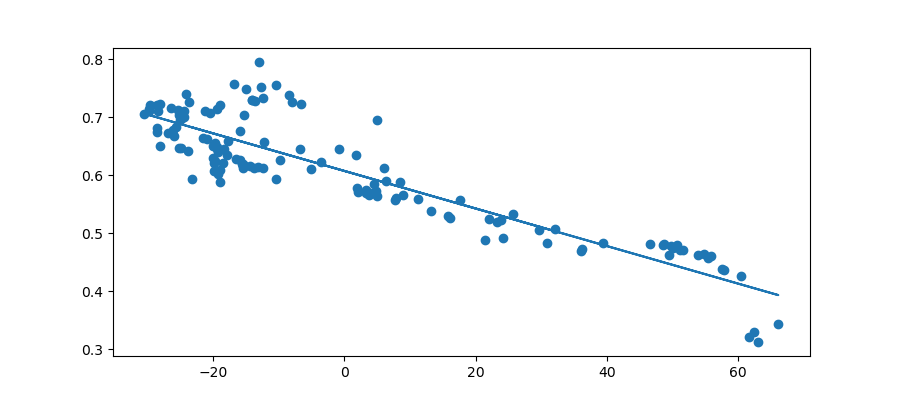

In [153]:
plt.clf()
plt.scatter(comp1, at_content)
slope, intercept = np.polyfit(comp1, at_content, 1)
plt.plot(comp1, slope*comp1+intercept)
plt.show()

In [ ]:
np.array(normalized_mats).shape

In [ ]:
np.array(vector_cgrs).shape